# Step 1: Install and import modules

In [75]:
!pip install opencv-python
!pip install matplotlib
!pip install numpy

You should consider upgrading via the 'C:\Users\Nuriya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Nuriya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Nuriya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [76]:
!pip install torch==1.7.1+cpu torchvision==0.8.2+cpu torchaudio===0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
!pip install easyocr

Looking in links: https://download.pytorch.org/whl/torch_stable.html


ERROR: Could not find a version that satisfies the requirement torch==1.7.1+cpu (from versions: 1.11.0, 1.11.0+cpu, 1.11.0+cu113, 1.11.0+cu115)
ERROR: No matching distribution found for torch==1.7.1+cpu
You should consider upgrading via the 'C:\Users\Nuriya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Nuriya\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


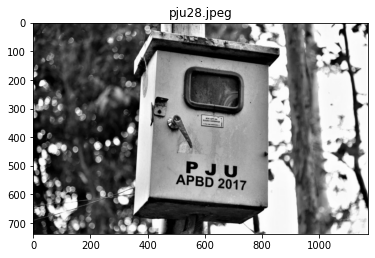

In [77]:
import cv2
import numpy as np
import easyocr
import matplotlib.pyplot as plt
%matplotlib inline
import mysql.connector


csx = mysql.connector.connect(user='root',password='', host='127.0.0.1',database='dbdayapju2')
cursor = csx.cursor()

query = ("SELECT gambar_monitoring_pju FROM monitoring_pju")
cursor.execute(query)
result = cursor.fetchall()

for i in range(len(result)):
    img = []
    
    img = cv2.imread('./images/{}'.format(result[6][0]))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.title(result[6][0])
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
    

# Step 2: Image loading and text recognition using EasyOCR

In [78]:
im_1_path = 'C:/xampp/htdocs/pantaudayaid/assets/images/pju28.jpeg'
# im_2_path = './images/2_handwriting.jpg'
# im_3_path = './images/3_digits.jpg'
# im_4_path = './images/4_invoice.jpg'
# im_5_path = './images/5_sign.jpg'

In [79]:
def recognize_text(img_path):
    '''loads an image and recognizes text.'''
    
    reader = easyocr.Reader(['en'])
    return reader.readtext(img_path)

In [80]:
result = recognize_text(im_1_path)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [81]:
result

[([[593, 331], [621, 331], [621, 349], [593, 349]],
  'suodt =',
  0.039098082512862134),
 ([[528, 474], [726, 474], [726, 554], [528, 554]], 'PJu', 0.5376371145248413),
 ([[493, 519], [754, 519], [754, 595], [493, 595]],
  'APBD 2017',
  0.7264325853139212),
 ([[617.3902892391503, 338.2073760108954],
   [650.9927337820337, 342.8796686324808],
   [649.6097107608497, 352.7926239891046],
   [616.0072662179663, 347.1203313675192]],
  '{Dieaeut',
  0.004299906203146845)]

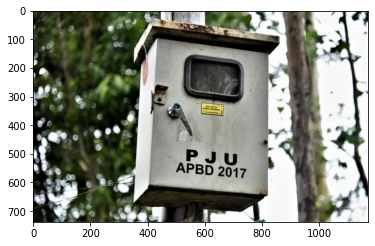

In [82]:
img_1 = cv2.imread(im_1_path)
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
plt.imshow(img_1)

# Step 3: Overlay recognized text on image using OpenCV

In [83]:
def overlay_ocr_text(img_path, save_name):
    '''loads an image, recognizes text, and overlays the text on the image.'''
    
    # loads image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    dpi = 80
    fig_width, fig_height = int(img.shape[0]/dpi), int(img.shape[1]/dpi)
    plt.figure()
    f, axarr = plt.subplots(1,2, figsize=(fig_width, fig_height)) 
    axarr[0].imshow(img)
    
    # recognize text
    result = recognize_text(img_path)

    # if OCR prob is over 0.5, overlay bounding box and text
    for (bbox, text, prob) in result:
        if prob >= 0.5:
            # display 
            print(f'Detected text: {text} (Probability: {prob:.2f})')

            # get top-left and bottom-right bbox vertices
            (top_left, top_right, bottom_right, bottom_left) = bbox
            top_left = (int(top_left[0]), int(top_left[1]))
            bottom_right = (int(bottom_right[0]), int(bottom_right[1]))

            # create a rectangle for bbox display
            cv2.rectangle(img=img, pt1=top_left, pt2=bottom_right, color=(255, 0, 0), thickness=10)

            # put recognized text
            cv2.putText(img=img, text=text, org=(top_left[0], top_left[1] - 10), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 0, 0), thickness=8)
        
    # show and save image
    axarr[1].imshow(img)
    plt.savefig(f'./text-recognition-ocr-python-main/text-recognition-ocr-python-main/output/{save_name}_overlay.jpg', bbox_inches='tight')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: PJu (Probability: 0.54)
Detected text: APBD 2017 (Probability: 0.73)


<Figure size 432x288 with 0 Axes>

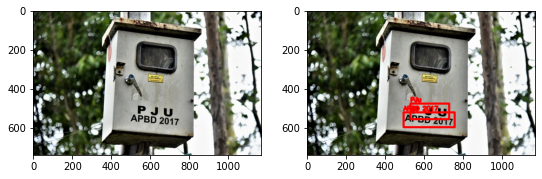

In [84]:
overlay_ocr_text(im_1_path, 'pju28')

In [85]:
overlay_ocr_text(im_2_path, '2_handwriting')

NameError: name 'im_2_path' is not defined

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: 30,480 (Probability: 0.99)
Detected text: KGS (Probability: 0.99)
Detected text: 67,200 (Probability: 0.78)
Detected text: LBS (Probability: 0.61)
Detected text: 2,185 (Probability: 1.00)
Detected text: KGS (Probability: 0.98)
Detected text: 4,820 (Probability: 0.73)
Detected text: LBS (Probability: 0.80)


<Figure size 432x288 with 0 Axes>

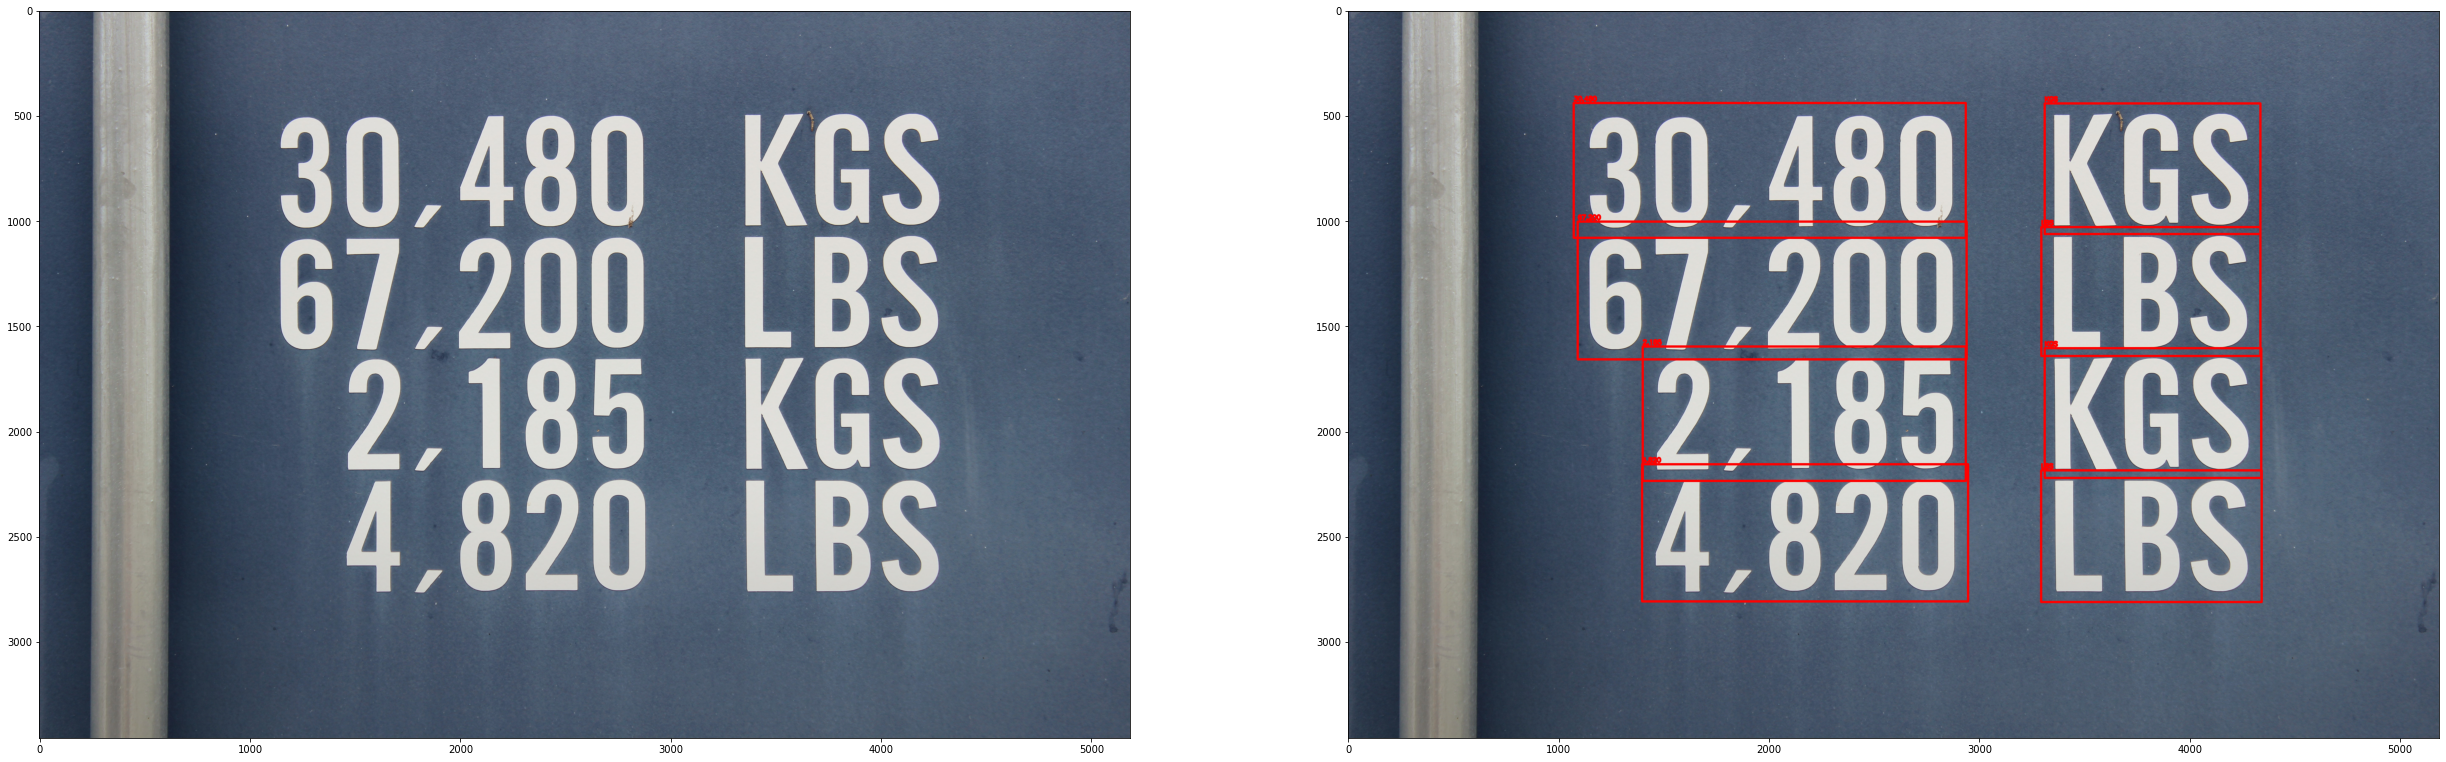

In [ ]:
overlay_ocr_text(im_3_path, '3_digits')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: Builders Inc. (Probability: 1.00)
Detected text: Ninja Sample (Probability: 0.93)
Detected text: 123 Ninja Blvd. (Probability: 0.71)
Detected text: 987 Conway Blvd. (Probability: 0.84)
Detected text: Contact@lnvoicelinja. com (Probability: 0.52)
Detected text: NinjaLand, 97315 (Probability: 0.66)
Detected text: Los Angeles, California 90210 (Probability: 0.83)
Detected text: 1-800-555-Ninja (Probability: 0.97)
Detected text: United States (Probability: 0.83)
Detected text: United States (Probability: 0.95)
Detected text: demo@invoiceninja. com (Probability: 0.67)
Detected text: Invoice Number (Probability: 1.00)
Detected text: 1564 (Probability: 0.68)
Detected text: INVOICE#1564 (Probability: 0.99)
Detected text: PO Number (Probability: 1.00)
Detected text: 1-259 (Probability: 0.59)
Detected text: Invoice Date (Probability: 0.96)
Detected text: Aug 4, 2015 (Probability: 0.56)
Detected text: Due Date (Probability: 0.69)
Detected text: Aug 31, 2015 (Probability: 0.55)
Dete

<Figure size 432x288 with 0 Axes>

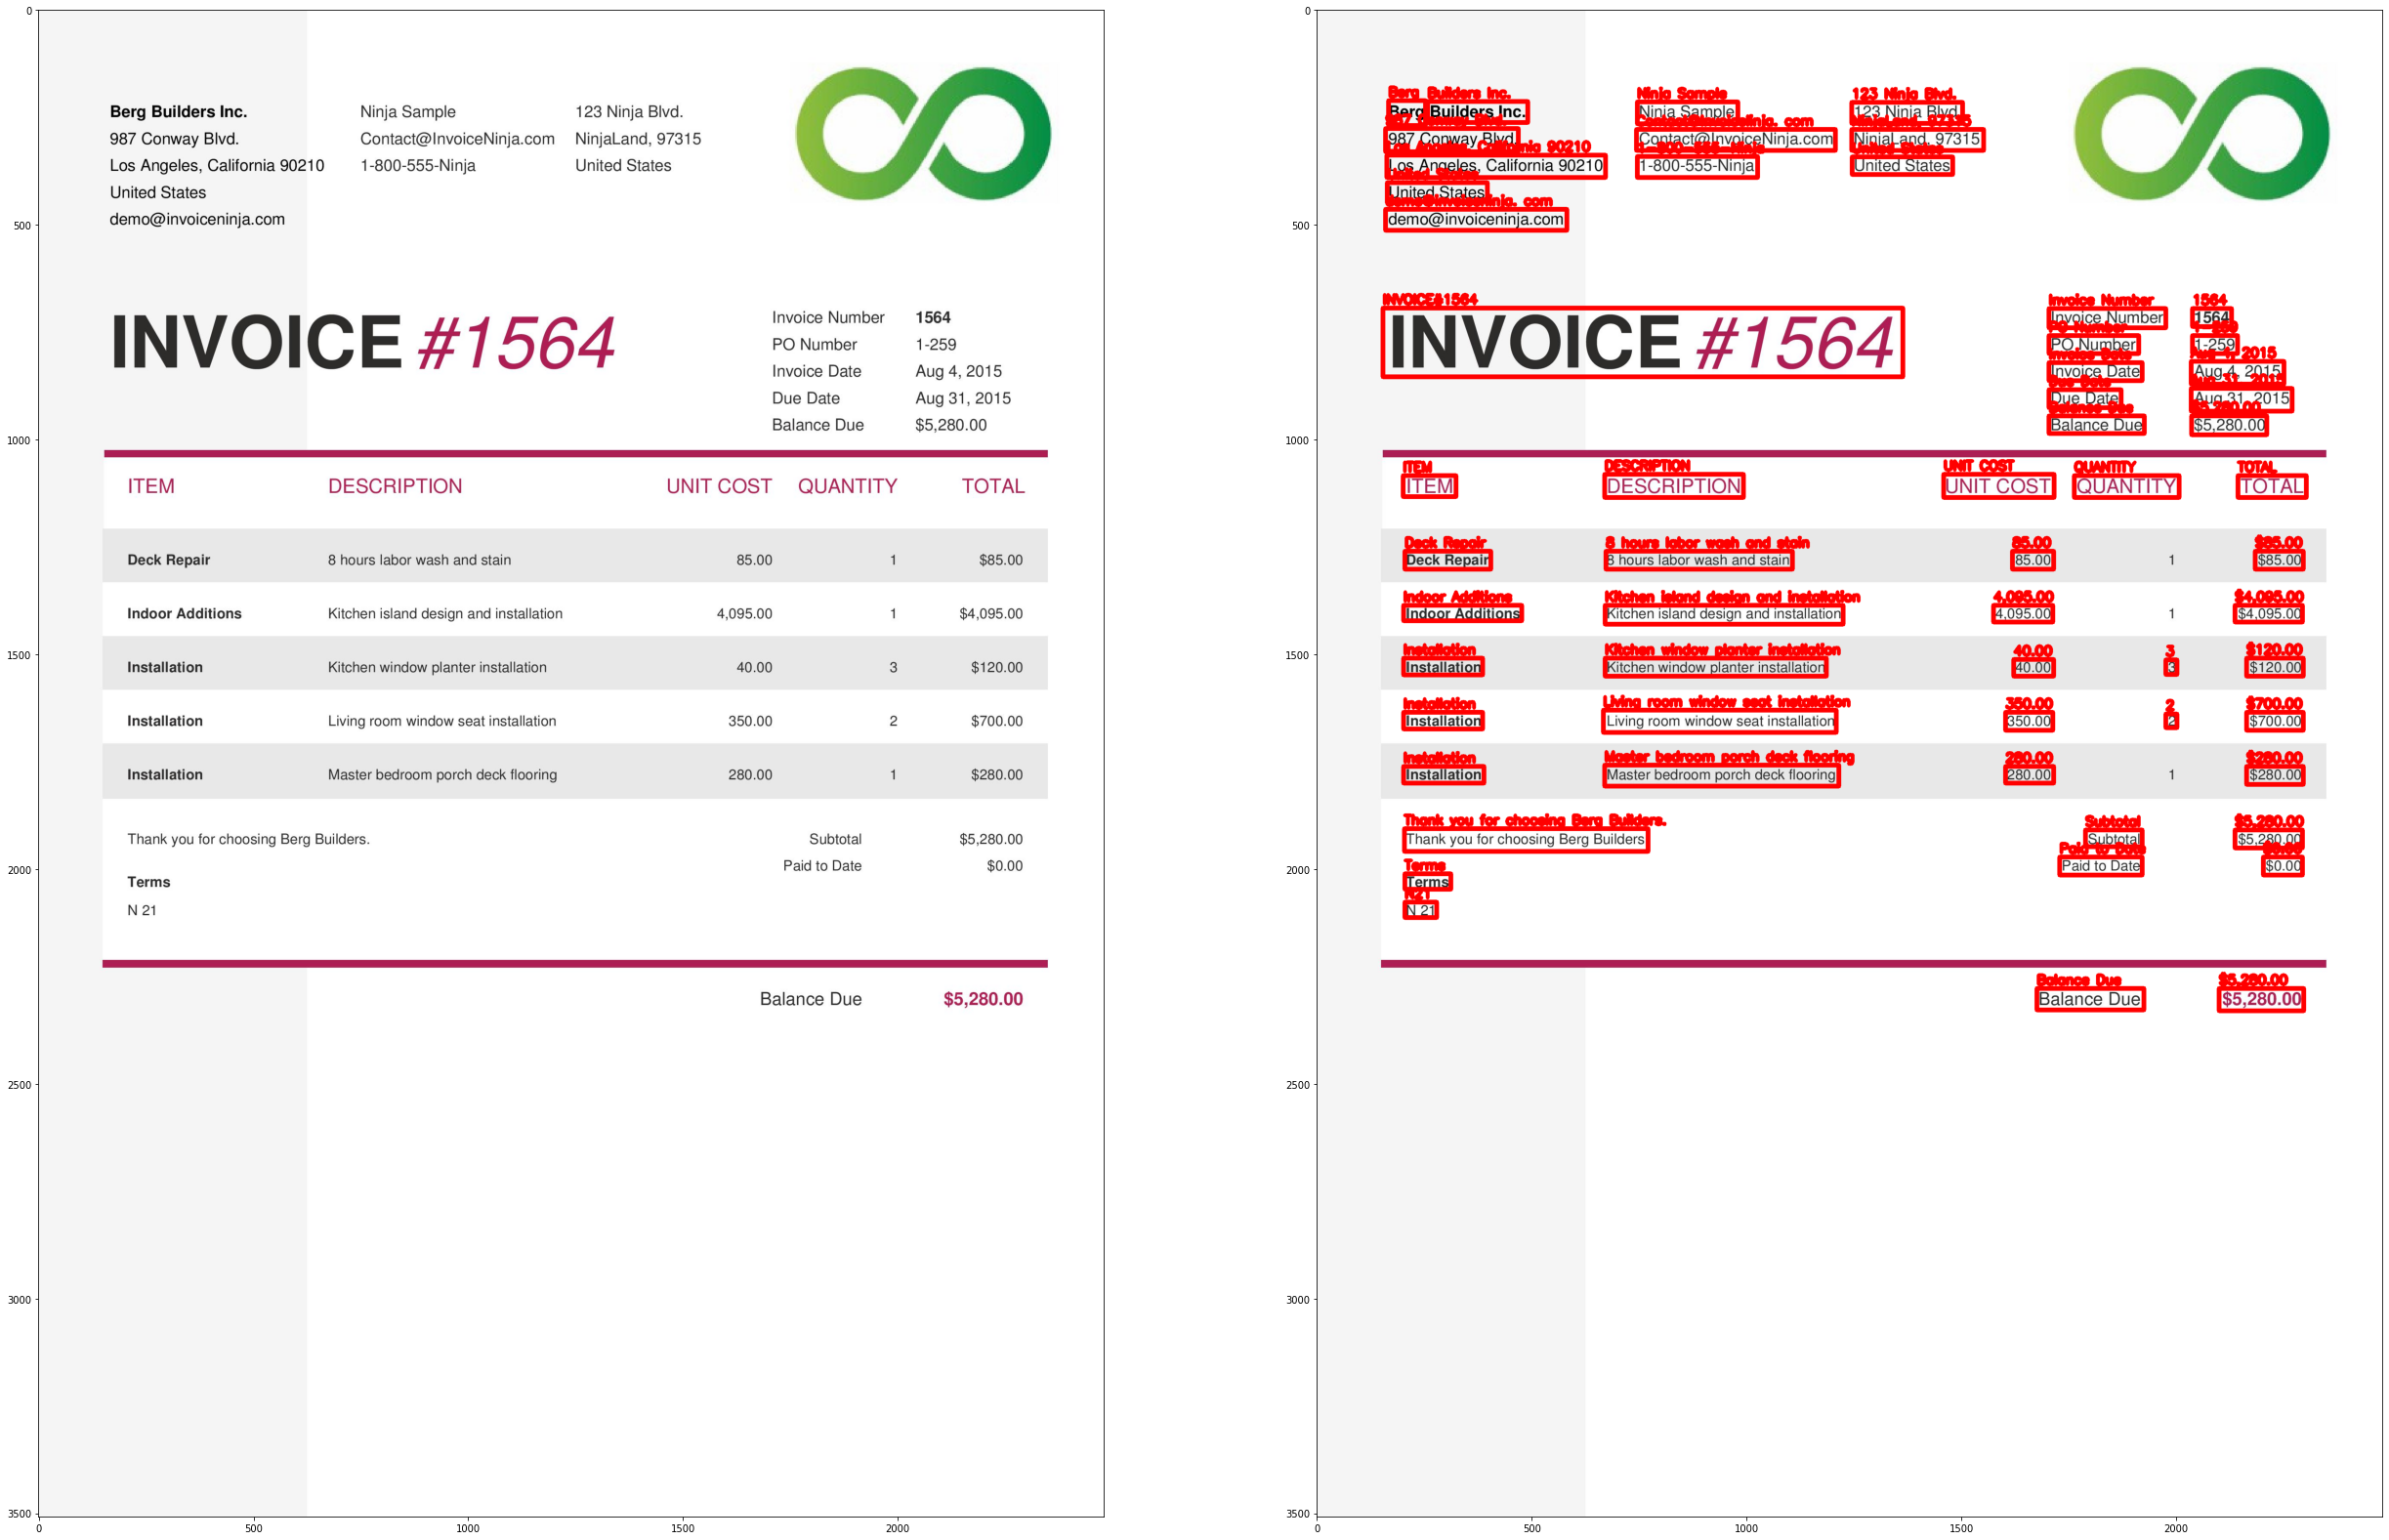

In [ ]:
overlay_ocr_text(im_4_path, '4_invoice')

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Detected text: NOTICE (Probability: 1.00)
Detected text: THANK (Probability: 1.00)
Detected text: YOU (Probability: 0.75)
Detected text: FOR (Probability: 0.92)
Detected text: NOTICING (Probability: 1.00)
Detected text: THIS (Probability: 0.82)
Detected text: NEW (Probability: 1.00)
Detected text: NOTICE (Probability: 0.62)
Detected text: YOUR (Probability: 0.89)
Detected text: NOTICING (Probability: 1.00)
Detected text: IT (Probability: 1.00)
Detected text: HAS (Probability: 1.00)
Detected text: BEEN (Probability: 1.00)
Detected text: NOTED (Probability: 1.00)
Detected text: AND WILL BE REPORTED TO THE AUTHORITIES (Probability: 0.56)


<Figure size 432x288 with 0 Axes>

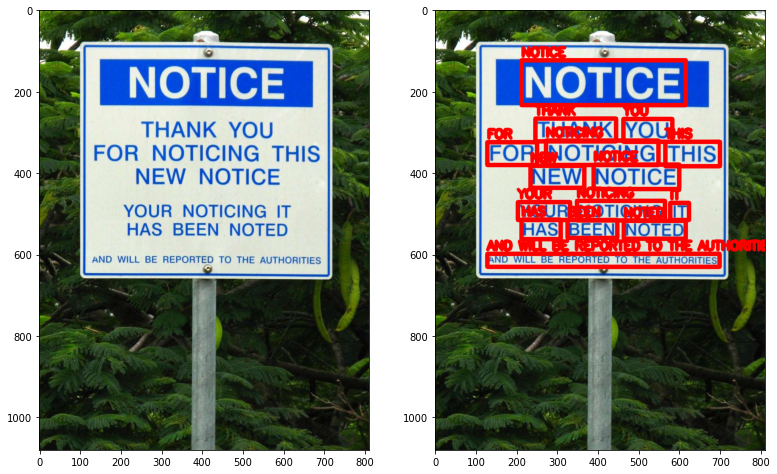

In [ ]:
overlay_ocr_text(im_5_path, '5_roadsign')

# Bonus: Text-to-speech recognition 

In [ ]:
!pip install pyttsx3

In [ ]:
result = recognize_text(im_5_path)

sentence = ''
for (bbox, text, prob) in result:
    sentence += f'{text} '
print(sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


NOTICE THANK YOU FOR NOTICING THIS NEW NOTICE YOUR NOTICING IT HAS BEEN NOTED AND WILL BE REPORTED TO THE AUTHORITIES 


In [ ]:
import pyttsx3

engine = pyttsx3.init()
engine.setProperty('rate', 100)
engine.say(sentence)
engine.runAndWait()